In [4]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [5]:
# Importing the model
model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\iRhto_models\\iRhtoC.xml")
model.objective = "BIOMASS_RT_CLIM"  


In [6]:
# Lab data
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 2.6619851, 3.1] # the fifth glc uptake value was calculated
solution = model.optimize()
# All fluxes
all_fluxes = solution.fluxes.to_frame(name='Flux')
all_fluxes

,Flux
RLFC2O_c,0.000000
RLFC2O_m,0.000000
BTDDH_c,0.000000
LLFC2O_c,0.000000
13GS_c,0.380252
...,...
ECOAI82e_x,0.000000
DECOAI82e_x,0.000000
DECOAR82e_x,0.000000
ECOAI81e_x,0.000000


In [7]:
# Get all fluxes on different glucose uptake
all_fluxes_dif_glucose_uptakes = pd.DataFrame(columns=['Glucose uptake', *all_fluxes.index], index=range(len(glucose_uptakes))) #flux_values.index gives the row names column, * extracts the list of strings
biomass_GR = []

for i in range(len(glucose_uptakes)):
    medium = model.medium
    medium["EX_glc__D_e"] = glucose_uptakes[i]
    model.medium = medium
    
    solution = model.optimize()
    all_fluxes_dif_glucose_uptakes.loc[i] = solution.fluxes[['EX_glc__D_e', *all_fluxes.index]].values
    biomass_GR += [solution.objective_value]
all_fluxes_dif_glucose_uptakes.insert(0, 'Biomass growth rate', biomass_GR, True)

all_fluxes_dif_glucose_uptakes

,Biomass growth rate,Glucose uptake,RLFC2O_c,RLFC2O_m,BTDDH_c,LLFC2O_c,13GS_c,16GS_c,PRMICI_c,P5CD_m,...,ECOAH101e_x,HACD101ei_x,ACACT101ei_x,ACOAD82ef_x,ACOAO82e_x,ECOAI82e_x,DECOAI82e_x,DECOAR82e_x,ECOAI81e_x,PACCOAE_x
0,0.033972,-0.476,0.0,0.0,0.0,0.0,0.03401,0.00895,0.002592,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.082746,-1.114,0.0,0.0,0.0,0.0,0.082839,0.0218,0.006314,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.123570,-1.648,0.0,0.0,0.0,0.0,0.123709,0.032555,0.009429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.173796,-2.305,0.0,0.0,0.0,0.0,0.173992,0.045787,0.013261,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.201087,-2.661985,0.0,0.0,0.0,0.0,0.201313,0.052977,0.015343,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.234573,-3.1,0.0,0.0,0.0,0.0,0.234836,0.061799,0.017898,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = all_fluxes_dif_glucose_uptakes[['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']]
exchange_fluxes_table

,EX_glc__D_e,EX_o2_e,EX_nh4_e,EX_so4_e,EX_pi_e,EX_co2_e
0,-0.476,-1.299965,-0.21939,-0.00279,-0.018291,1.436344
1,-1.114,-2.893941,-0.534371,-0.006796,-0.044552,3.226121
2,-1.648,-4.228085,-0.798007,-0.010149,-0.066533,4.724148
3,-2.305,-5.86953,-1.122368,-0.014274,-0.093576,6.567226
4,-2.661985,-6.76142,-1.298612,-0.016515,-0.10827,7.568674
5,-3.1,-7.855755,-1.51486,-0.019265,-0.126299,8.797435


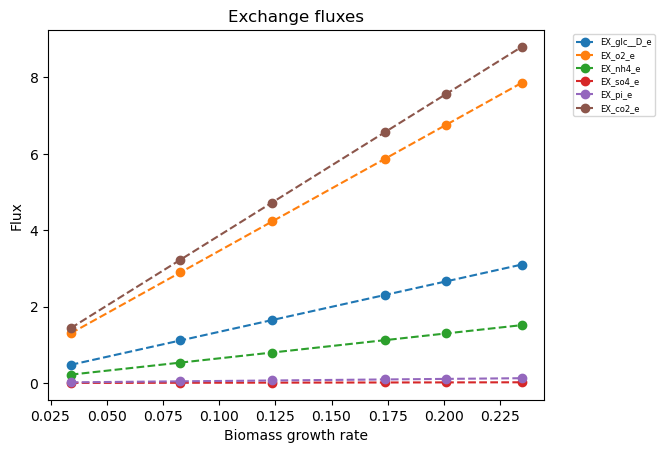

In [9]:
# Exchange fluxes plot
GR_range = all_fluxes_dif_glucose_uptakes['BIOMASS_RT_CLIM']
plt.plot(GR_range, np.abs(exchange_fluxes_table[exchange_fluxes_table.columns]), 'o--', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.yticks(range(0, 20, 1))
plt.show()

In [10]:
PPP_fluxes = all_fluxes_dif_glucose_uptakes[['BIOMASS_RT_CLIM', 'EX_glc__D_e', 'G6PDH2i_c', 'TKT1_c', 'TALA_c','TKT2_c', 'PYRDC_c','PDH_m']] #'XPK' (Xylulose-5-phosphate phosphoketolase) and 'FPK' (Fructose-6-phosphate phosphoketolase) - couldnt find these from iRhto model 
# Change G6PDH2rp column name to oxpp 
PPP_fluxes = PPP_fluxes.rename(columns = {'G6PDH2i_c': 'oxpp'})
PPP_fluxes

,BIOMASS_RT_CLIM,EX_glc__D_e,oxpp,TKT1_c,TALA_c,TKT2_c,PYRDC_c,PDH_m
0,0.033972,-0.476,0.244966,0.080545,-0.242963,0.07198,0.0,0.53112
1,0.082746,-1.114,0.596667,0.196186,-0.546388,0.175322,0.0,1.202857
2,0.12357,-1.648,0.891037,0.292975,-0.800353,0.261819,0.0,1.765094
3,0.173796,-2.305,1.253212,0.41206,-1.112814,0.368239,0.0,2.456835
4,0.201087,-2.661985,1.450002,0.476765,-1.282592,0.426063,0.0,2.832697
5,0.234573,-3.1,1.69146,0.556157,-1.490907,0.497012,0.0,3.293873


In [16]:
ATPM_ACITL_fluxes = all_fluxes_dif_glucose_uptakes[['ATPM_c', 'ACITL_c', 'ACS_n']] #ACS - Acetyl-CoA synthetase
ATPM_ACITL_fluxes

,ATPM_c,ACITL_c,ACS_n
0,1.189,0.187384,0.0
1,1.189,0.456413,0.0
2,1.189,0.681589,0.0
3,1.189,0.95863,0.0
4,1.189,1.109162,0.0
5,1.189,1.293863,0.0


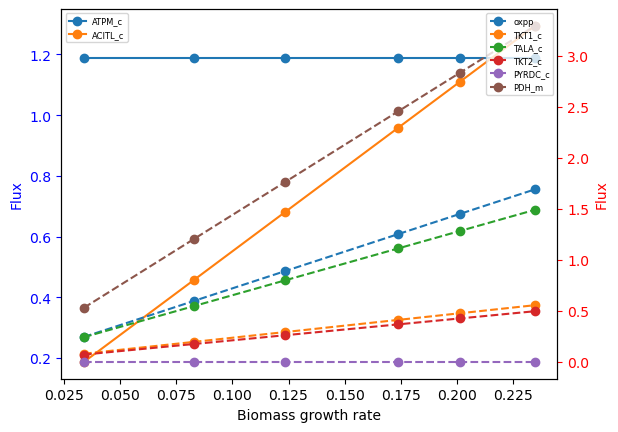

In [12]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis
GR_range = all_fluxes_dif_glucose_uptakes['BIOMASS_RT_CLIM']
# Sample data
x = GR_range
y1 = np.abs(ATPM_ACITL_fluxes[['ATPM_c', 'ACITL_c']])
y2 = np.abs(PPP_fluxes[['oxpp', 'TKT1_c', 'TALA_c','TKT2_c', 'PYRDC_c','PDH_m']])

# # Define colors for each label
# colors = {'ATPM': 'black', 'ACITL': 'orange', 'oxpp': 'yellow', 'TKT1': 'green', 'TKT2': 'blue', 'TALA': 'red', 'XPK': 'pink','PYRDC': 'brown' ,'PDHm': 'purple'}
# labels = ['ATPM', 'ACITL', 'oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm']
# Create the first plot
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATPM_c', 'ACITL_c'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'TKT1_c', 'TALA_c','TKT2_c', 'PYRDC_c','PDH_m'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

In [13]:
# Get all fluxes to excel
with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\iRhto_results\\iRhto_all_fluxes_dif_glc_uptakes.xlsx') as excel_writer:
    all_fluxes_dif_glucose_uptakes.to_excel(excel_writer, sheet_name='Glucose uptake range 0.49-3.1', index=True)

In [14]:
#  Get all flux values separately for dif growth rates, make them to a csv file
for i in range(len(glucose_uptakes)):
    all_fluxes_dif_glucose_uptakes.loc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\iRhto_results\\iRhto_csv\\iRhto_flux_values_glucose_uptake_{glucose_uptakes[i]}.csv', index=True)

In [15]:
# #Calculating the missing glucose uptake form lab data, when growth rate is 0.25
# growth_rates = np.array([0.049, 0.100, 0.151, 0.203, 0.25, 0.301]) 
# glucose_uptakes= np.array([-0.476, -1.114, -1.648, -2.305, -2.6619851, -3.1])

# Getting the missing glucose uptake when GR is 0.25
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
# lm.fit(growth_rates[:, None], glucose_uptakes)

# y = lm.coef_ * 0.25 + lm.intercept_
# y